In [3]:
import os

# Путь к папке с данными
data_path = r'C:\Users\77715\Desktop\aml\belgium'

# Проверка содержимого
for root, dirs, files in os.walk(data_path):
    print(f"Каталог: {root}")
    print(f"Подкаталоги: {dirs}")
    print(f"Файлы: {len(files)}")


Каталог: C:\Users\77715\Desktop\aml\belgium
Подкаталоги: ['BelgiumTSC_Testing', 'BelgiumTSC_Training', 'BelgiumTSD_annotations (1)', 'NonTS_TestingBG', 'Seqs_poses_annotations (1)']
Файлы: 0
Каталог: C:\Users\77715\Desktop\aml\belgium\BelgiumTSC_Testing
Подкаталоги: ['Testing']
Файлы: 0
Каталог: C:\Users\77715\Desktop\aml\belgium\BelgiumTSC_Testing\Testing
Подкаталоги: ['00000', '00001', '00002', '00003', '00004', '00005', '00006', '00007', '00008', '00009', '00010', '00011', '00012', '00013', '00014', '00015', '00016', '00017', '00018', '00019', '00020', '00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028', '00029', '00030', '00031', '00032', '00033', '00034', '00035', '00036', '00037', '00038', '00039', '00040', '00041', '00042', '00043', '00044', '00045', '00046', '00047', '00048', '00049', '00050', '00051', '00052', '00053', '00054', '00055', '00056', '00057', '00058', '00059', '00060', '00061']
Файлы: 1
Каталог: C:\Users\77715\Desktop\aml\belgium\BelgiumTSC_Testi

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Параметры генераторов
batch_size = 32
img_size = (128, 128)

# Генераторы данных
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # 20% для валидации
)

# Тренировочные данные
train_ds = datagen.flow_from_directory(
    r'C:\Users\77715\Desktop\aml\belgium',  # Путь к вашей папке
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

# Валидационные данные
val_ds = datagen.flow_from_directory(
    r'C:\Users\77715\Desktop\aml\belgium',  # Путь к вашей папке
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# Проверим классы
print(f"Классы: {train_ds.class_indices}")


Found 5676 images belonging to 5 classes.
Found 1419 images belonging to 5 classes.
Классы: {'BelgiumTSC_Testing': 0, 'BelgiumTSC_Training': 1, 'BelgiumTSD_annotations (1)': 2, 'NonTS_TestingBG': 3, 'Seqs_poses_annotations (1)': 4}


In [14]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
import tensorflow as tf

# Загрузка базовой модели
base_model = EfficientNetB0(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Замораживаем веса базовой модели

# Добавление новых слоёв
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dense(train_ds.num_classes, activation="softmax")  # Количество классов
])

# Компиляция модели
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Обучение модели
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/5


C:\Users\77715\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 94s 480ms/step - accuracy: 0.6350 - loss: 0.7310 - val_accuracy: 0.6448 - val_loss: 0.7225
Epoch 2/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 74s 417ms/step - accuracy: 0.6115 - loss: 0.6817 - val_accuracy: 0.6448 - val_loss: 0.6888
Epoch 3/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 76s 426ms/step - accuracy: 0.6490 - loss: 0.6548 - val_accuracy: 0.6448 - val_loss: 0.6612
Epoch 4/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 86s 484ms/step - accuracy: 0.6448 - loss: 0.6605 - val_accuracy: 0.6448 - val_loss: 0.6608
Epoch 5/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 79s 444ms/step - accuracy: 0.6376 - loss: 0.6596 - val_accuracy: 0.6448 - val_loss: 0.6606


In [15]:
# Размораживаем базовую модель
base_model.trainable = True

# Улучшенная модель
extended_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation="relu"),  # Увеличили количество нейронов
    layers.BatchNormalization(),  # Нормализация
    layers.Dropout(0.5),  # Dropout для предотвращения переобучения
    layers.Dense(train_ds.num_classes, activation="softmax")
])

# Компиляция улучшенной модели
extended_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Уменьшили скорость обучения
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Обучение улучшенной модели
history_extended = extended_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


Epoch 1/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 406s 2s/step - accuracy: 0.2768 - loss: 2.4156 - val_accuracy: 0.4017 - val_loss: 1.3673
Epoch 2/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.4697 - loss: 1.6938 - val_accuracy: 0.3650 - val_loss: 1.6015
Epoch 3/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 358s 2s/step - accuracy: 0.6068 - loss: 1.2233 - val_accuracy: 0.6025 - val_loss: 1.4355
Epoch 4/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.7104 - loss: 0.9708 - val_accuracy: 0.5574 - val_loss: 2.6229
Epoch 5/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.7921 - loss: 0.7085 - val_accuracy: 0.4581 - val_loss: 5.2119


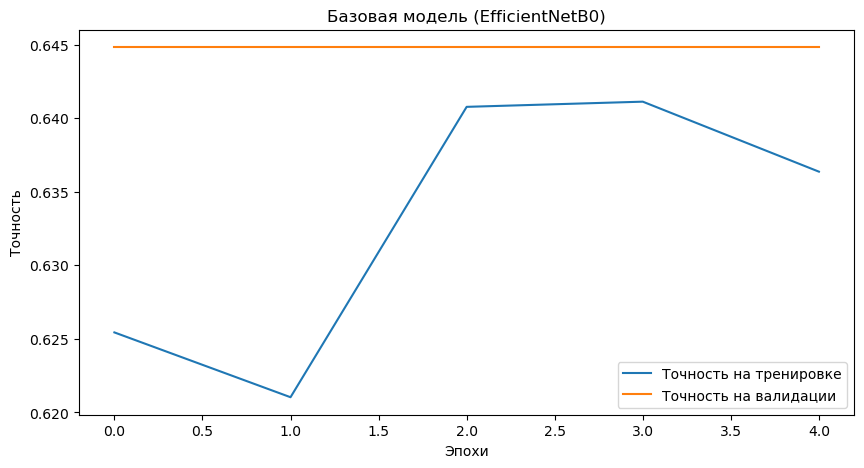

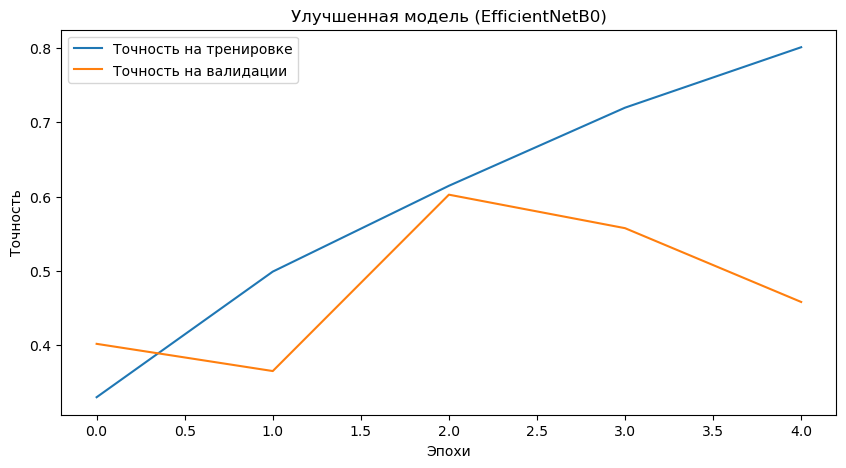

In [16]:
import matplotlib.pyplot as plt

def plot_metrics(history, title):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Точность на тренировке')
    plt.plot(history.history['val_accuracy'], label='Точность на валидации')
    plt.title(title)
    plt.xlabel('Эпохи')
    plt.ylabel('Точность')
    plt.legend()
    plt.show()

# График для базовой модели
plot_metrics(history, "Базовая модель (EfficientNetB0)")

# График для улучшенной модели
plot_metrics(history_extended, "Улучшенная модель (EfficientNetB0)")


In [17]:
from sklearn.metrics import classification_report
import numpy as np

# Функция для оценки
def evaluate_model(model, dataset):
    y_true = []
    y_pred = []
    for images, labels in dataset:
        preds = model.predict(images)
        y_true.extend(np.argmax(labels, axis=1))
        y_pred.extend(np.argmax(preds, axis=1))
    return y_true, y_pred

# Оценка улучшенной модели
y_true, y_pred = evaluate_model(extended_model, val_ds)
print(classification_report(y_true, y_pred, target_names=list(train_ds.class_indices.keys())))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

KeyboardInterrupt: 

In [18]:
pip install streamlit



  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/9a/14/857d0734989f3d26f2f965b2e3f67568ea7a6e8a60cb9c1ed7f774b6d606/streamlit-1.40.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/9b/52/4a86a4fa1cc2aae79137cc9510b7080c3e5aede2310d14fae5486feec7f7/altair-5.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/10/cb/f2ad4230dc2eb1a74edf38f1a38b9b52277f75bef262d8908e60d957e13c/blinker-1.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/a4/07/14f8ad37f2d12a5ce41206c21820d8cb6561b728e51fad4530dff0552a67/cachetools-5.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.19,<4,>=3.0.7 from https://files.pythonhosted.org/packages/e9/bd/cc3a402a6439c15c3d4294333e13042b915bbeab54edc